<a href="https://colab.research.google.com/github/borjiUWM/recurrent-neural-networks/blob/master/Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
x_data = np.random.rand(100).astype(np.float32)

In [0]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [0]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [0]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [14]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 != 0:
        print(step, evals)
        train_data.append(evals)

(1, [2.4386065, 2.3055394])
(2, [2.4759233, 2.2806215])
(3, [2.5132499, 2.26198])
(4, [2.5474474, 2.2433336])
(6, [2.6095061, 2.2102075])
(7, [2.6374838, 2.1952486])
(8, [2.663609, 2.1812723])
(9, [2.6880085, 2.1682215])
(11, [2.7320755, 2.1446497])
(12, [2.7519493, 2.1340191])
(13, [2.7705095, 2.1240911])
(14, [2.787843, 2.1148193])
(16, [2.8191488, 2.0980737])
(17, [2.8332675, 2.0905216])
(18, [2.846453, 2.0834687])
(19, [2.858767, 2.076882])
(21, [2.8810072, 2.0649855])
(22, [2.8910372, 2.0596201])
(23, [2.9004045, 2.0546098])
(24, [2.9091525, 2.0499303])
(26, [2.9249523, 2.0414789])
(27, [2.932078, 2.0376675])
(28, [2.9387324, 2.034108])
(29, [2.9449472, 2.0307837])
(31, [2.9561718, 2.0247796])
(32, [2.9612339, 2.0220718])
(33, [2.9659615, 2.019543])
(34, [2.9703765, 2.0171814])
(36, [2.9783504, 2.012916])
(37, [2.9819467, 2.0109923])
(38, [2.9853053, 2.0091958])
(39, [2.988442, 2.007518])
(41, [2.9941068, 2.0044878])
(42, [2.9966617, 2.0031214])
(43, [2.9990475, 2.001845])
(44, [3

[2.4386065, 2.3055394]
[2.4759233, 2.2806215]
[2.5132499, 2.26198]
[2.5474474, 2.2433336]
[2.6095061, 2.2102075]
[2.6374838, 2.1952486]
[2.663609, 2.1812723]
[2.6880085, 2.1682215]
[2.7320755, 2.1446497]
[2.7519493, 2.1340191]
[2.7705095, 2.1240911]
[2.787843, 2.1148193]
[2.8191488, 2.0980737]
[2.8332675, 2.0905216]
[2.846453, 2.0834687]
[2.858767, 2.076882]
[2.8810072, 2.0649855]
[2.8910372, 2.0596201]
[2.9004045, 2.0546098]
[2.9091525, 2.0499303]
[2.9249523, 2.0414789]
[2.932078, 2.0376675]
[2.9387324, 2.034108]
[2.9449472, 2.0307837]
[2.9561718, 2.0247796]
[2.9612339, 2.0220718]
[2.9659615, 2.019543]
[2.9703765, 2.0171814]
[2.9783504, 2.012916]
[2.9819467, 2.0109923]
[2.9853053, 2.0091958]
[2.988442, 2.007518]
[2.9941068, 2.0044878]
[2.9966617, 2.0031214]
[2.9990475, 2.001845]
[3.0012758, 2.000653]
[3.0053, 1.9985005]
[3.0071151, 1.9975296]
[3.00881, 1.9966229]
[3.0103931, 1.9957763]
[3.013252, 1.994247]
[3.0145414, 1.9935572]
[3.0157456, 1.9929131]
[3.0168703, 1.9923116]
[3.0189013

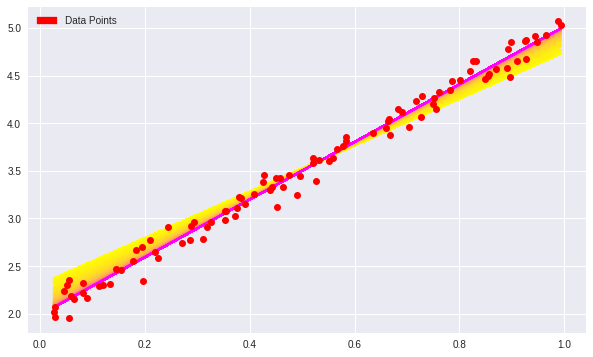

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    print(f)
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [19]:
iris_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [20]:
iris_X.shape

(149, 4)

In [0]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

In [0]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

In [29]:
b

<tf.Variable 'Variable_5:0' shape=(3,) dtype=float32_ref>

In [0]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

In [31]:
weights

<tf.Variable 'Variable_8:0' shape=(4, 3) dtype=float32_ref>

In [0]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [0]:
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [0]:
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [0]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

In [0]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [44]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.333333, cost 34.3212, change in cost 34.3212
step 10, training accuracy 0.444444, cost 30.3112, change in cost 4.01002
step 20, training accuracy 0.646465, cost 28.343, change in cost 1.96822
step 30, training accuracy 0.646465, cost 26.6752, change in cost 1.66773
step 40, training accuracy 0.646465, cost 25.286, change in cost 1.38924
step 50, training accuracy 0.646465, cost 24.1367, change in cost 1.14935
step 60, training accuracy 0.646465, cost 23.1847, change in cost 0.951929
step 70, training accuracy 0.646465, cost 22.3917, change in cost 0.79306
step 80, training accuracy 0.646465, cost 21.7253, change in cost 0.666321
step 90, training accuracy 0.646465, cost 21.1601, change in cost 0.56525
step 100, training accuracy 0.666667, cost 20.6758, change in cost 0.484318
step 110, training accuracy 0.666667, cost 20.2567, change in cost 0.419064
step 120, training accuracy 0.666667, cost 19.8907, change in cost 0.366037
step 130, training accuracy 0.666

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


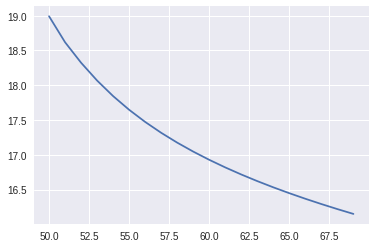

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [0]:
def plot_act(i=1.0, actfunc=lambda x: x):
    ws = np.arange(-0.5, 0.5, 0.05)
    bs = np.arange(-0.5, 0.5, 0.05)

    X, Y = np.meshgrid(ws, bs)

    os = np.array([actfunc(tf.constant(w*i + b)).eval(session=sess) \
                   for w,b in zip(np.ravel(X), np.ravel(Y))])

    Z = os.reshape(X.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

In [48]:
#start a session
sess = tf.Session();
#create a simple input of 3 real values
i = tf.constant([1.0, 2.0, 3.0], shape=[1, 3])
#create a matrix of weights
w = tf.random_normal(shape=[3, 3])
#create a vector of biases
b = tf.random_normal(shape=[1, 3])
#dummy activation function
def func(x): return x
#tf.matmul will multiply the input(i) tensor and the weight(w) tensor then sum the result with the bias(b) tensor.
act = func(tf.matmul(i, w) + b)
#Evaluate the tensor to a numpy array
act.eval(session=sess)

array([[-5.7151837, -3.170189 , 10.312736 ]], dtype=float32)

In [49]:
w.eval(session=sess)

array([[ 0.65717435,  0.95245206,  0.6431635 ],
       [-0.94684964,  1.8078141 ,  0.42827365],
       [-0.2166905 ,  2.2075174 ,  0.25804025]], dtype=float32)

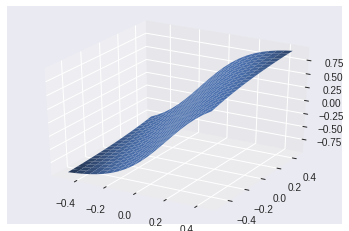

In [50]:
plot_act(3.0, tf.tanh)

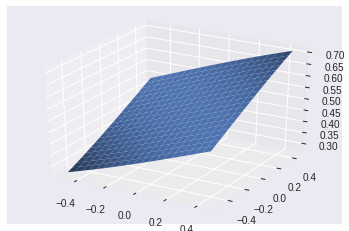

In [0]:
plot_act(1, tf.sigmoid)

In [0]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,1]]

print ('Without zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print ('With zero padding \n')
print (sg.convolve( I, g))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


In [0]:
y= np.conv2d(I,g,"valid")  #we will understand why we used the argument valid in the next example


AttributeError: ignored

In [0]:
import tensorflow as tf

#Building graph

input = tf.Variable(tf.random_normal([1,10,10,1]))
filter = tf.Variable(tf.random_normal([3,3,1,1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[ 3.83312136e-01]
   [-1.07100499e+00]
   [ 7.89145827e-01]
   [-4.43235606e-01]
   [-2.16041088e-01]
   [ 1.82583857e+00]
   [-2.01432157e+00]
   [-1.30242193e+00]
   [ 1.40961909e+00]
   [-3.81217271e-01]]

  [[-1.02560377e+00]
   [-4.57101196e-01]
   [-1.03777695e+00]
   [-2.01052690e+00]
   [ 4.49969739e-01]
   [ 5.28774619e-01]
   [ 9.67273936e-02]
   [ 1.12754025e-01]
   [-1.83029628e+00]
   [-1.27229199e-01]]

  [[-1.02863336e+00]
   [-4.14387137e-01]
   [ 8.84312272e-01]
   [-2.86405832e-02]
   [ 7.75571644e-01]
   [-2.99592227e-01]
   [-6.20068252e-01]
   [ 8.61941099e-01]
   [-1.66251373e+00]
   [ 7.18592048e-01]]

  [[-7.12802410e-01]
   [ 5.06085157e-01]
   [-4.40016240e-01]
   [ 1.33714902e+00]
   [-4.74786103e-01]
   [-3.14772964e-01]
   [-7.30481803e-01]
   [-1.08249974e+00]
   [ 6.89433932e-01]
   [-9.99067247e-01]]

  [[-1.67796254e+00]
   [ 7.04711080e-01]
   [ 4.13750708e-01]
   [ 1.03808331e+00]
   [ 3.08511710e+00]
   [ 6.57749295e-01]
   [-9.87430871e-0

In [0]:
input.shape

TensorShape([Dimension(1), Dimension(10), Dimension(10), Dimension(1)])

In [0]:
result2.shape

(1, 10, 10, 1)

In [0]:
filter.shape


TensorShape([Dimension(3), Dimension(3), Dimension(1), Dimension(1)])

In [51]:
import tensorflow as tf
tf.__version__

'1.12.0'

In [52]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [55]:
mnist[0]

In [0]:
sess = tf.InteractiveSession()

In [57]:
sess

In [93]:
mnist.train.images[2000,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
x  = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [64]:
x

<tf.Tensor 'Placeholder_4:0' shape=(?, 784) dtype=float32>

In [65]:
y_

<tf.Tensor 'Placeholder_5:0' shape=(?, 10) dtype=float32>

In [0]:
# Weight tensor
W = tf.Variable(tf.zeros([784,10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

In [95]:
W.shape

TensorShape([Dimension(784), Dimension(10)])

In [68]:
b

<tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>

In [69]:
W

<tf.Variable 'Variable_10:0' shape=(784, 10) dtype=float32_ref>

In [71]:
W[1:]

<tf.Tensor 'strided_slice_1:0' shape=(783, 10) dtype=float32>

In [0]:
# run the op initialize_all_variables using an interactive session
sess.run(tf.global_variables_initializer())

In [73]:
W

<tf.Variable 'Variable_10:0' shape=(784, 10) dtype=float32_ref>

In [74]:
x.shape

TensorShape([Dimension(None), Dimension(784)])

In [75]:
W.shape

TensorShape([Dimension(784), Dimension(10)])

In [76]:
b.shape

TensorShape([Dimension(10)])

In [0]:
aa = tf.matmul(x,W) + b

In [79]:
aa

<tf.Tensor 'add_4:0' shape=(?, 10) dtype=float32>

In [80]:
aa.shape

TensorShape([Dimension(None), Dimension(10)])

In [0]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [82]:
y

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

In [0]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [0]:
aa = tf.reduce_sum([1,2,3,4])

In [0]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [0]:
#Load 50 training examples for each training iteration   
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [97]:
batch

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.,

In [100]:
batch[1].shape

(50, 10)

In [0]:
#Load 50 training examples for each training iteration   
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [106]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100
print("The final accuracy for the simple ANN model is: {} % ".format(acc) )
accT = accuracy.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels}) * 100
print("The final accuracy for the simple ANN model is: {} % ".format(accT) )

The final accuracy for the simple ANN model is: 91.3299977779 % 
The final accuracy for the simple ANN model is: 91.2345468998 % 


In [105]:
tf.reduce_mean(correct_prediction)

TypeError: ignored

In [0]:
sess.close() #finish the session


In [108]:
import tensorflow as tf

# finish possible remaining session
sess.close()

#Start interactive session
sess = tf.InteractiveSession()


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])



x_image = tf.reshape(x, [-1,28,28,1])  
x_image

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

In [109]:
x_image.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [110]:
flat

784

In [0]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [0]:
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

In [113]:
convolve1

<tf.Tensor 'add_6:0' shape=(?, 28, 28, 32) dtype=float32>

In [126]:
import tensorflow as tf

# finish possible remaining session
sess.close()

#Start interactive session
sess = tf.InteractiveSession()


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])



x_image = tf.reshape(x, [-1,28,28,1])  
x_image


W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs


convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1


h_conv1 = tf.nn.relu(convolve1)

conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv1


W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs


convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')+ b_conv2

h_conv2 = tf.nn.relu(convolve2)


conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv2




layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])


W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs


fcl=tf.matmul(layer2_matrix, W_fc1) + b_fc1


h_fc1 = tf.nn.relu(fcl)
h_fc1


keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop


W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]


fc=tf.matmul(layer_drop, W_fc2) + b_fc2


y_CNN= tf.nn.softmax(fc)
y_CNN


cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))


train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)



correct_prediction = tf.equal(tf.argmax(y_CNN,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())





for i in range(1100):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, float(train_accuracy)))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.06
step 100, training accuracy 0.9
step 200, training accuracy 0.86
step 300, training accuracy 0.94
step 400, training accuracy 0.88
step 500, training accuracy 0.92
step 600, training accuracy 0.98
step 700, training accuracy 0.88
step 800, training accuracy 0.98
step 900, training accuracy 0.92
step 1000, training accuracy 1


In [127]:
print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9647


In [123]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print(tf.transpose(x))

Tensor("transpose_1:0", shape=(3, 2), dtype=int32)


--2018-11-26 04:11:40--  http://deeplearning.net/tutorial/code/utils.py
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/plain]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2018-11-26 04:11:41 (456 MB/s) - ‘utils1.py’ saved [5097/5097]



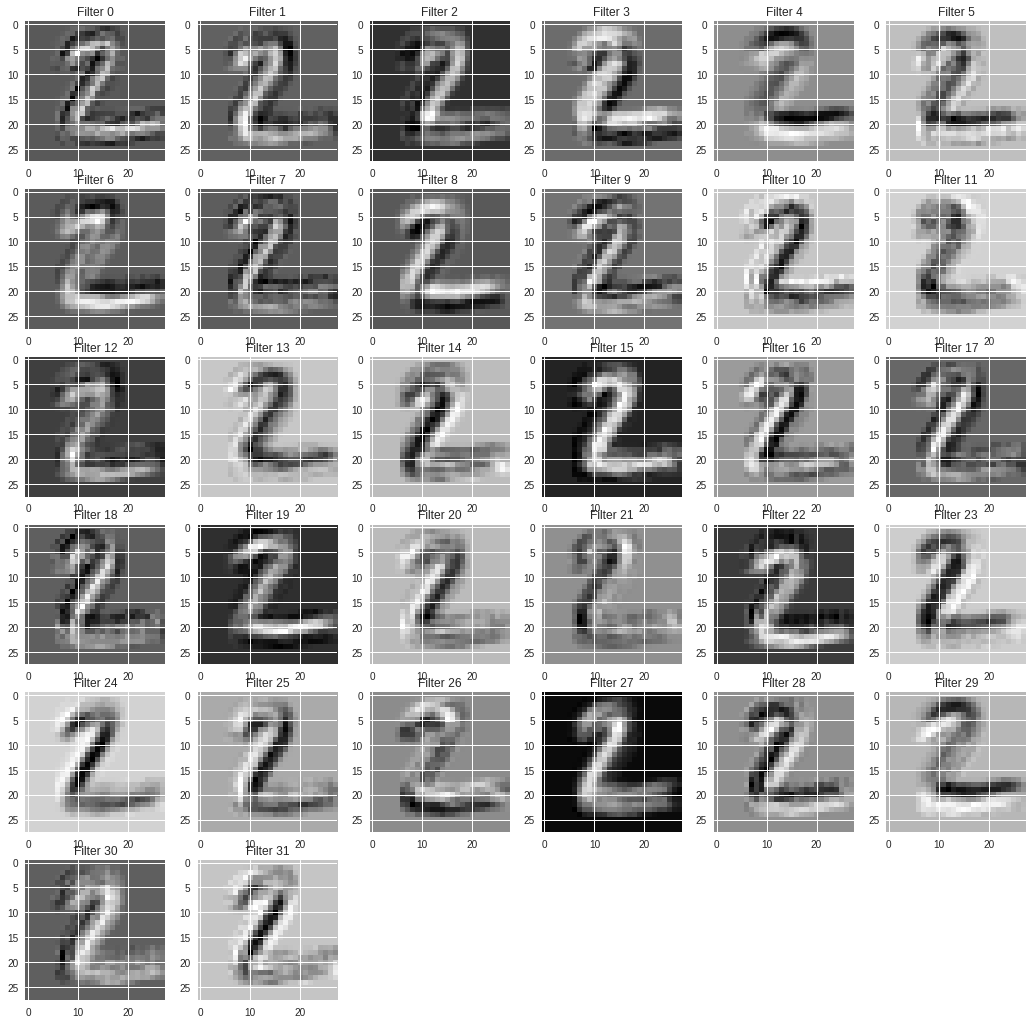

In [132]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32,-1]))


!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py
import utils1
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  


import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")


ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

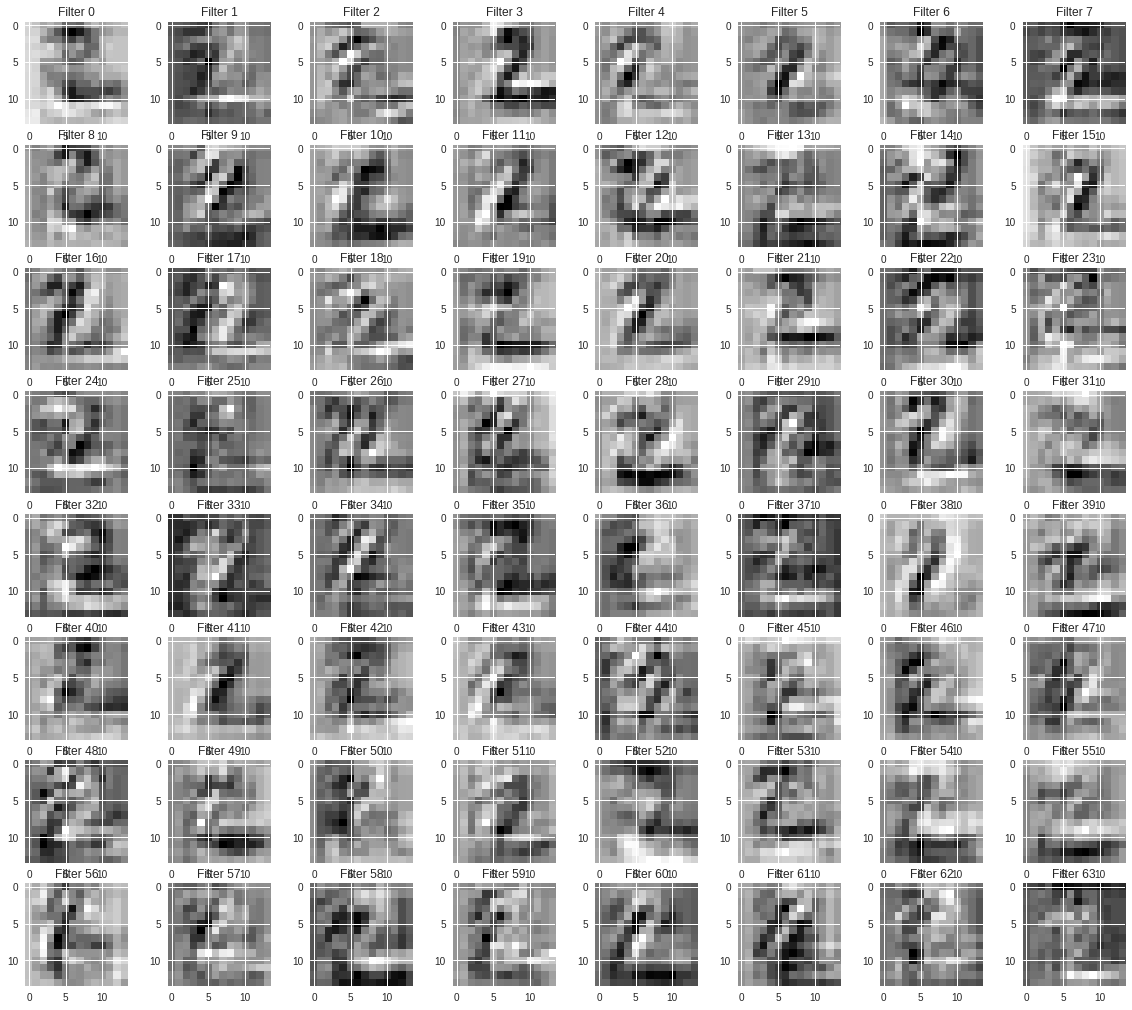

In [133]:
ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [118]:
kernels

array([[-4.74866703e-02,  5.87054826e-02,  8.51124302e-02,
         7.14936033e-02,  3.36714238e-02, -5.09093516e-02,
        -2.05368567e-02, -1.43362135e-01,  6.00590482e-02,
         1.89623404e-02,  1.96721956e-01,  1.19410805e-01,
         4.61962223e-02, -8.45419466e-02, -7.62782916e-02,
         1.82560030e-02,  1.46587476e-01, -8.33035409e-02,
         1.61832333e-01, -1.32479087e-01,  2.13059299e-02,
         7.31627420e-02, -1.56238735e-01,  2.47390065e-02,
         1.08023882e-01],
       [ 1.90079778e-01, -5.11214286e-02,  2.43031438e-02,
        -1.61933452e-01,  1.85994044e-01, -2.24790685e-02,
         9.34659541e-02,  4.90340926e-02, -6.71103671e-02,
         7.85102416e-03,  6.72556907e-02,  1.11439712e-02,
         6.13602623e-03,  1.50636837e-01, -7.27295130e-02,
        -1.73188336e-02,  2.00248454e-02,  9.18893144e-02,
         6.98930100e-02,  1.00336529e-01, -1.38341933e-01,
         7.66727626e-02, -1.13826342e-01,  7.48210996e-02,
        -5.21322452e-02],
    

In [119]:
kernels.shape

(32, 25)

In [134]:
import numpy as np
import tensorflow as tf
sess = tf.Session()


LSTM_CELL_SIZE = 4  # output size (dimension), which is same as hidden size in the cell

lstm_cell = tf.contrib.rnn.BasicLSTMCell(LSTM_CELL_SIZE, state_is_tuple=True)
state = (tf.zeros([2,LSTM_CELL_SIZE]),)*2
state



sample_input = tf.constant([[1,2,3,4,3,2],[3,2,2,2,2,2]],dtype=tf.float32)
print (sess.run(sample_input))


with tf.variable_scope("LSTM_sample1"):
    output, state_new = lstm_cell(sample_input, state)
sess.run(tf.global_variables_initializer())
print (sess.run(state_new))


print (sess.run(output))

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
[[1. 2. 3. 4. 3. 2.]
 [3. 2. 2. 2. 2. 2.]]
LSTMStateTuple(c=array([[ 0.28063294,  0.9376214 ,  0.48046312,  0.03510219],
       [ 0.4248925 ,  0.75720155,  0.5656328 , -0.19917116]],
      dtype=float32), h=array([[ 0.15864183,  0.4627387 ,  0.34781057,  0.02240114],
       [ 0.32244474,  0.5290899 ,  0.37655193, -0.12957826]],
      dtype=float32))
[[ 0.15864183  0.4627387   0.34781057  0.02240114]
 [ 0.32244474  0.5290899   0.37655193 -0.12957826]]


In [135]:
lstm_cell

In [136]:
state

(<tf.Tensor 'zeros_6:0' shape=(2, 4) dtype=float32>,
 <tf.Tensor 'zeros_6:0' shape=(2, 4) dtype=float32>)

In [138]:
print(sample_input)

Tensor("Const_428:0", shape=(2, 6), dtype=float32)


In [139]:
sess = tf.Session()

LSTM_CELL_SIZE = 4  #4 hidden nodes = state_dim = the output_dim 
input_dim = 6
num_layers = 2


cells = []
for _ in range(num_layers):
    cell = tf.contrib.rnn.LSTMCell(LSTM_CELL_SIZE)
    cells.append(cell)
stacked_lstm = tf.contrib.rnn.MultiRNNCell(cells)


# Batch size x time steps x features.
data = tf.placeholder(tf.float32, [None, None, input_dim])
output, state = tf.nn.dynamic_rnn(cell, data, dtype=tf.float32)


#Batch size x time steps x features.
sample_input = [[[1,2,3,4,3,2], [1,2,1,1,1,2],[1,2,2,2,2,2]],[[1,2,3,4,3,2],[3,2,2,1,1,2],[0,0,0,0,3,2]]]
sample_input

sess.run(tf.global_variables_initializer())
sess.run(output, feed_dict={data: sample_input})

array([[[ 0.04751207,  0.17077863,  0.10130953, -0.17036858],
        [ 0.11315535,  0.23720756,  0.22894567, -0.09312856],
        [ 0.11886472,  0.28320658,  0.28758618, -0.11927529]],

       [[ 0.04751207,  0.17077863,  0.10130953, -0.17036858],
        [ 0.11029681,  0.1860683 ,  0.16186279, -0.11670331],
        [ 0.17460008,  0.45264795,  0.11103483,  0.21507351]]],
      dtype=float32)

In [144]:
output.shape

TensorShape([Dimension(None), Dimension(None), Dimension(4)])

In [145]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf



from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz


In [146]:
trainimgs = mnist.train.images
trainlabels = mnist.train.labels
testimgs = mnist.test.images
testlabels = mnist.test.labels 

ntrain = trainimgs.shape[0]
ntest = testimgs.shape[0]
dim = trainimgs.shape[1]
nclasses = trainlabels.shape[1]
print ("Train Images: ", trainimgs.shape)
print ("Train Labels  ", trainlabels.shape)
print ("Test Images:  " , testimgs.shape)
print ("Test Labels:  ", testlabels.shape)


('Train Images: ', (55000, 784))
('Train Labels  ', (55000, 10))
('Test Images:  ', (10000, 784))
('Test Labels:  ', (10000, 10))


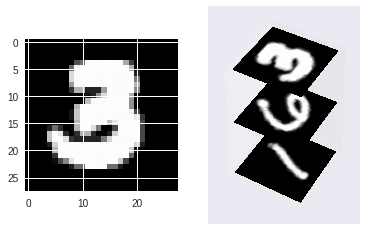

Sample: 200 - Class: [3] - Label Vector: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 
Sample: 201 - Class: [6] - Label Vector: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 
Sample: 202 - Class: [1] - Label Vector: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 


In [152]:
samplesIdx = [200, 201, 202]  #<-- You can change these numbers here to see other samples

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.imshow(testimgs[samplesIdx[0]].reshape([28,28]), cmap='gray')


xx, yy = np.meshgrid(np.linspace(0,28,28), np.linspace(0,28,28))
X =  xx ; Y =  yy
Z =  100*np.ones(X.shape)

img = testimgs[700].reshape([28,28])
ax = fig.add_subplot(122, projection='3d')
ax.set_zlim((0,200))


offset=200
for i in samplesIdx:
    img = testimgs[i].reshape([28,28]).transpose()
    ax.contourf(X, Y, img, 200, zdir='z', offset=offset, cmap="gray")
    offset -= 100

    ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()


for i in samplesIdx:
    print ("Sample: {0} - Class: {1} - Label Vector: {2} ".format(i, np.nonzero(testlabels[i])[0], testlabels[i]))



In [0]:
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)


learning_rate = 0.001
training_iters = 100000
batch_size = 100
display_step = 10

In [0]:
x = tf.placeholder(dtype="float", shape=[None, n_steps, n_input], name="x") # Current data input shape: (batch_size, n_steps, n_input) [100x28x28]
y = tf.placeholder(dtype="float", shape=[None, n_classes], name="y")

In [0]:
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [0]:
lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)

In [0]:
outputs, states = tf.nn.dynamic_rnn(lstm_cell, inputs=x, dtype=tf.float32)


In [0]:
output = tf.reshape(tf.split(outputs, 28, axis=1, num=None, name='split')[-1],[-1,128])
pred = tf.matmul(output, weights['out']) + biases['out']

In [159]:
pred

<tf.Tensor 'add_15:0' shape=(?, 10) dtype=float32>

In [160]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred ))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [162]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:

        # We will read a batch of 100 images [100 x 784] as batch_x
        # batch_y is a matrix of [100x10]
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # We consider each row of the image as one sequence
        # Reshape data to get 28 seq of 28 elements, so that, batxh_x is [100x28x28]
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
    

        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

Iter 1000, Minibatch Loss= 2.003757, Training Accuracy= 0.26000
Iter 2000, Minibatch Loss= 1.713291, Training Accuracy= 0.35000
Iter 3000, Minibatch Loss= 1.545805, Training Accuracy= 0.41000
Iter 4000, Minibatch Loss= 1.158914, Training Accuracy= 0.64000
Iter 5000, Minibatch Loss= 0.855931, Training Accuracy= 0.72000
Iter 6000, Minibatch Loss= 0.941169, Training Accuracy= 0.70000
Iter 7000, Minibatch Loss= 0.752999, Training Accuracy= 0.73000
Iter 8000, Minibatch Loss= 0.764583, Training Accuracy= 0.72000
Iter 9000, Minibatch Loss= 0.819373, Training Accuracy= 0.76000
Iter 10000, Minibatch Loss= 0.411289, Training Accuracy= 0.89000
Iter 11000, Minibatch Loss= 0.549124, Training Accuracy= 0.80000
Iter 12000, Minibatch Loss= 0.603629, Training Accuracy= 0.80000
Iter 13000, Minibatch Loss= 0.559376, Training Accuracy= 0.84000
Iter 14000, Minibatch Loss= 0.313733, Training Accuracy= 0.88000
Iter 15000, Minibatch Loss= 0.398822, Training Accuracy= 0.85000
Iter 16000, Minibatch Loss= 0.3655